# <center> <img src="../img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
## <center> **Big Data** </center>
---
### <center> **Autumn 2025** </center>
---
### <center> **Examples on MapReduce with Apache Spark** </center>
---
**Profesor**: Pablo Camarillo Ramirez

# Find the PySpark Installation

In [1]:
import findspark
findspark.init()

# Create SparkSession

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Examples on Map Reduce") \
    .master("spark://22410cdc64b0:7077") \
    .config("spark.ui.port", "4040") \
    .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/09 14:59:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Actividad: Counting words
## Create the RDD

In [3]:
words = ["apple", "banana", "apple", "orange",
         "banana", "apple", "orange", "orange"]

words_rdd = sc.parallelize(words)

## Hacer pares

In [4]:
pares_rdd = words_rdd.map(lambda word: (word, 1))

## Reducimos claves

In [5]:
word_counting_rdd = pares_rdd.reduceByKey(lambda a, b: a + b)

## Resultado

In [6]:
resultado = word_counting_rdd.collect()
for word, conteo in resultado:
    print(f"{word}: {conteo}")


[Stage 0:=============================>                             (1 + 1) / 2]

banana: 2
orange: 3
apple: 3


## DAG

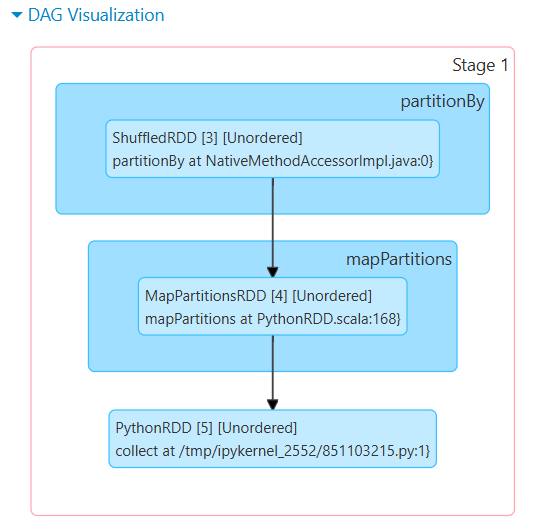